In [1]:
%store -r fpr_r
%store -r tpr_r
%store -r roc_auc_r
%store -r pred
%store -r cum_values_r
%store -r goal_rate_r
%store -r perc
%store -r fpr_h
%store -r tpr_h
%store -r roc_auc_h
%store -r y_prob_h
%store -r cum_values_h
%store -r goal_rate_h
%store -r df_total
%store -r y_val_r
%store -r y_val_h
%store -r info_neural_network

no stored variable or alias fpr_r
no stored variable or alias tpr_r
no stored variable or alias roc_auc_r
no stored variable or alias pred
no stored variable or alias cum_values_r
no stored variable or alias goal_rate_r
no stored variable or alias perc
no stored variable or alias fpr_h
no stored variable or alias tpr_h
no stored variable or alias roc_auc_h
no stored variable or alias y_prob_h
no stored variable or alias cum_values_h
no stored variable or alias goal_rate_h
no stored variable or alias df_total
no stored variable or alias y_val_r
no stored variable or alias y_val_h


In [2]:
print(info_neural_network)

(array([0.        , 0.00218129, 0.00219204, ..., 0.99951646, 0.99951646,
       1.        ]), array([0.        , 0.00265027, 0.00265027, ..., 0.99989399, 1.        ,
       1.        ]), array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1]), [26.484063267707825, 24.19727647304534, 22.704443216323853, 21.653206765651703, 20.828584015369426, 20.11165052652359, 19.519043564796448, 18.969776451587673, 18.441034972667698, 17.939804673194885, 17.48833656311035, 17.052138566970825, 16.65020662546158

In [26]:
import q6_model_noe
from etape2_Q3 import *

In [27]:
model = q6_model_noe.SVM(df_total)
model.train()

SVC(probability=True)

In [28]:
y_pred_n, y_prob_n = model.predict()

In [29]:
y_test_n = model.y_test

In [30]:
y_test_n

55627    0
43468    0
59199    0
29625    0
12628    0
        ..
25981    0
6059     0
16730    0
57708    0
18596    0
Name: Est_un_but, Length: 6212, dtype: int64

In [31]:
fpr_n, tpr_n, roc_auc_n = get_roc_data(y_test_n, y_prob_n[:,1])
perc_n, perc_values_n, num_goals_n = get_percentile_goal_chance(y_prob_n[:,1], y_test_n)
sum_goal_shot = len(y_test_n)/100
goal_rate_n = [i/sum_goal_shot for i in num_goals_n]
goal_rate_n = [i*100 for i in perc_values_n]
cum_values_n = np.cumsum(num_goals_n)
sum = np.sum(num_goals_n)/100
cum_values_n = [i/sum for i in cum_values_n]

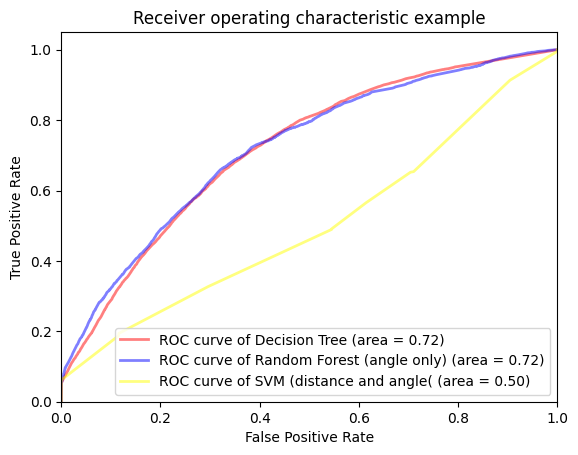

In [32]:
plt.figure()
lw = 2
plt.plot(fpr_r,tpr_r,color="red",lw=lw,alpha=0.5,label="ROC curve of Decision Tree (area = %0.2f)" % roc_auc_r)
plt.plot(fpr_h,tpr_h,color="blue",lw=lw,alpha=0.5,label="ROC curve of Random Forest (area = %0.2f)" % roc_auc_h)
plt.plot(fpr_n,tpr_n,color="yellow",lw=lw,alpha=0.5,label="ROC curve of SVM (area = %0.2f)" % roc_auc_n)
plt.plot(fpr_d,tpr_d,color="yellow",lw=lw,alpha=0.5,label="ROC curve of SVM (area = %0.2f)" % roc_auc_n)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

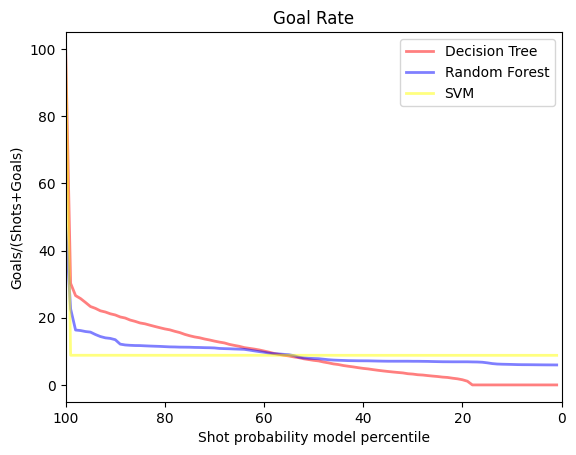

In [33]:
plt.figure()
lw = 2
plt.plot(perc, goal_rate_r, color="red", alpha=0.5, lw=lw, label="Decision Tree")
plt.plot(perc, goal_rate_h, color="blue", alpha=0.5, lw=lw, label="Random Forest")
plt.plot(perc, goal_rate_n, color="yellow", alpha=0.5, lw=lw, label="SVM")

plt.xlim([100, 0])
#plt.ylim([0, 100])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Goals/(Shots+Goals)")
plt.title("Goal Rate")
plt.legend(loc="upper right")
plt.show()

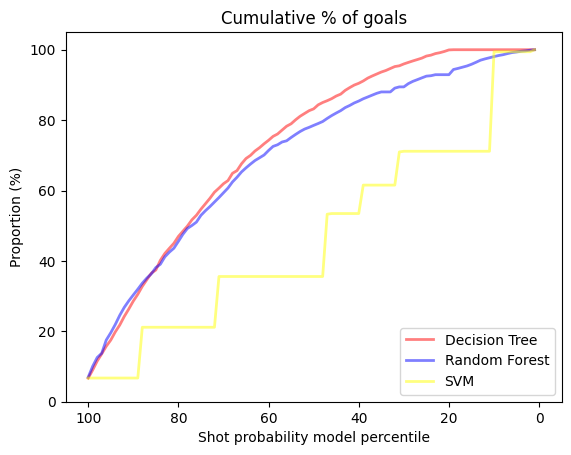

In [34]:
plt.figure()
lw = 2
plt.plot(perc,cum_values_r,color="red",alpha=0.5,lw=lw,label="Decision Tree")
plt.plot(perc,cum_values_h,color="blue",alpha=0.5,lw=lw,label="Random Forest")
plt.plot(perc,cum_values_n,color="yellow",alpha=0.5,lw=lw,label="SVM")


plt.xlim([105, -5])
plt.ylim([0, 105])
plt.xlabel("Shot probability model percentile")
plt.ylabel("Proportion (%)")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.show()

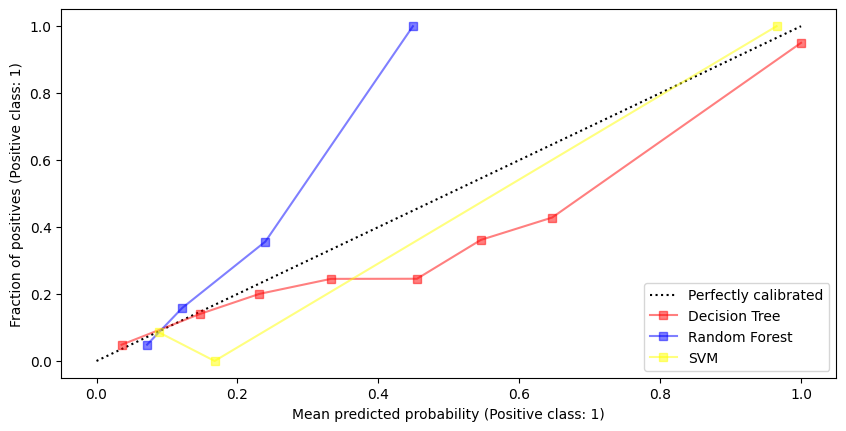

In [35]:
from sklearn.calibration import CalibrationDisplay
from matplotlib.gridspec import GridSpec
#Decision Tree
y_val_r = np.array(y_val_r)
y_val_r = y_val_r.reshape(-1, 1)
pred = pred[:,1]
pred = np.array(pred)
pred = pred.reshape(-1, 1)

#Random Forest
y_val_h = np.array(y_val_h)
y_val_h = y_val_h.reshape(-1, 1)
y_prob_h = y_prob_h[:,1]
y_prob_h = np.array(y_prob_h)
y_prob_h = y_prob_h.reshape(-1, 1)

#SVM
y_test_n = np.array(y_test_n)
y_test_n = y_test_n.reshape(-1, 1)
y_prob_n = y_prob_n[:,1]
y_prob_n = np.array(y_prob_n)
y_prob_n = y_prob_n.reshape(-1, 1)

fig = plt.figure(figsize=(10,10))
ax_calibration_curve = fig.add_subplot(GridSpec(4,2)[:2,:2])
disp = CalibrationDisplay.from_predictions(y_val_r, pred , color="red", name="Decision Tree", alpha=0.5, ax=ax_calibration_curve, n_bins=10)
disp = CalibrationDisplay.from_predictions(y_val_h, y_prob_h, color="blue",name="Random Forest",alpha=0.5, ax=ax_calibration_curve,n_bins=10)
disp = CalibrationDisplay.from_predictions(y_test_n, y_prob_n, color="yellow",name="SVM",alpha=0.5, ax=ax_calibration_curve,n_bins=10)